<a href="https://colab.research.google.com/github/rafaelnduarte/Reducao_Turnover_RH_ML/blob/master/Data_Science_para_RH_Turnover_Regress%C3%A3o_Log%C3%ADstica%2C_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science para Recursos Humanos

[![LinkedIn](https://img.shields.io/badge/LinkedIn-rafaelnduarte-blue.svg)](https://www.linkedin.com/in/rafael-n-duarte)
[![GitHub](https://img.shields.io/badge/GitHub-rafaelnduarte-purple.svg)](https://github.com/rafaelnduarte)

Com o imenso volume de dados sendo criado atualmente, é vital que as empresas saibam coletar e utilizar dados que possam dar a elas vantagens competitivas no mercado.

Além de casos mais comuns como [Sistemas de Recomendação]('https://www.ilumeo.com.br/todos-posts/2019/08/12/como-funcionam-os-sistemas-de-recomendacao'), outras áreas e outros tipos de empresas também podem se beneficiar da Ciência de Dados.

<center><img alt="Recursos Humanos" width="60%" src="https://image.freepik.com/free-vector/job-applicants-interviewers-collection_1284-26227.jpg
"></center>


> O objetivo deste projeto é analisar e buscar soluções para diminuir o **Turnover**, e aumentar a retenção de bons profissionais nas empresas.

Utilizando dados disponibilizados no [Kaggle]('https://kaggle.com/'), construiremos um modelo de Machine Learning capaz de nos ajudar a prever possíveis atritos, que podem ajudar empresas a tomarem decisões afim de minimizar esses efeitos, aumentar a qualidade de vida no ambiente de trabalho, e reter os bons profissionais da empresa.

In [0]:
#@title
# hide warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# installing scikit-plot
!pip install -q scikit-plot

In [0]:
# importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scikitplot as skplt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# importando recursos de Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, classification_report, log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Origem dos dados
Dados criados e disponibilizados por Cientistas De Dados da [IBM]('https://www.ibm.com/br-pt'), adquiridos através da plataforma de Ciência de Dados [Kaggle]('https://kaggle.com/').

In [0]:
# importando os dados
df_ibm = pd.read_csv('https://raw.githubusercontent.com/rafaelnduarte/Data_Science_For_HR/master/data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

## Dicionário de variáveis
Breve explicação das variáveis categóricas:

* Education 
  * 1 'Below College'
  * 2 'College'
  * 3 'Bachelor'
  * 4 'Master'
  * 5 'Doctor'

* EnvironmentSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* JobInvolvement
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* JobSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* PerformanceRating
  * 1 'Low'
  * 2 'Good'
  * 3 'Excellent'
  * 4 'Outstanding'

* RelationshipSatisfaction
  * 1 'Low'
  * 2 'Medium'
  * 3 'High'
  * 4 'Very High'

* WorkLifeBalance
  * 1 'Bad'
  * 2 'Good'
  * 3 'Better'
  * 4 'Best'

In [4]:
# verificando as primeiras entradas
df_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# verificando o tamanho do dataset
print("Informações Sobre o Dataset")
print("Variáveis:\t {}".format(df_ibm.shape[1]))
print("Entradas:\t {}\n".format(df_ibm.shape[0]))
print("O dataset não apresenta dados ausentes:\n")

# identificando os tipos das variáveis
display(df_ibm.info())

Informações Sobre o Dataset
Variáveis:	 35
Entradas:	 1470

O dataset não apresenta dados ausentes:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction   

None

In [6]:
# distribuição estatística das variáveis
df_ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Insights
Algumas informações básicas podem ser retiradas desta distribuição estatística, como por exemplo:

* A média de idade na empresa é de quase 37 anos de idade.
* A maioria dos funcionários possui Ensino Superior.
* Como se trata de um conjunto de dados oriundo dos Estados Unidos, consideramos os valores monetários como Dólar. Neste caso, o salário médio mensal da empresa é de US$6502.93.
*

In [7]:
# distribuição estatística das variáveis categóricas
df_ibm.describe(include='O')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### Insights
A variável `Attrition` ("Atrito"), indica se o funcionário possui atrito, problema, no ambiente de trabalho. Usaremos ela como variável alvo do nosso modelo de Machine Learning. No nosso dataset, ela seria a categoria mais marcante de motivo para que o profissional saia da empresa, e por isso focamos nela.

Com acesso a mais dados, poderíamos usar outros indicadores, ou criar novas features que representem melhor a chance de um funcionário deixar a empresa.

* A maior parte dos funcionários nâo apresenta atritos.
* O departamento com mais funcionários na empresa é Pesquisa e Desenvolvimento.
* Homens são maioria na empresa.
* O emprego mais comum na empresa é de Executivo de Vendas.
* A maioria dos funcionários é casado.
* A grande maioria dos funcionários não faz hora extra.

## Igualdade de Gênero

É muito importante estar atento a um tema como Igualdade de Gênero. Tendo acesso aos dados de salário e educação dos funcionários, é possível ver como se comparam os salários entre homens e mulheres.

In [8]:
# nível de educação por gênero
df_ibm.groupby(['Gender']).Education.value_counts(ascending=False)[:20]

Gender  Education
Female  3            235
        4            154
        2            117
        1             60
        5             22
Male    3            337
        4            244
        2            165
        1            110
        5             26
Name: Education, dtype: int64

In [9]:
# distribuição estatística da variável educação por gênero
df_ibm.groupby(['Gender']).Education.describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,2.933673,1.007986,1.0,2.0,3.0,4.0,5.0
Male,882.0,2.899093,1.035148,1.0,2.0,3.0,4.0,5.0


In [10]:
# distribuição estatística da renda mensal por gênero
df_ibm.groupby(['Gender']).MonthlyIncome.describe()


,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,588.0,6686.566327,4695.608507,1129.0,3037.0,5081.5,8711.75,19973.0
Male,882.0,6380.507937,4714.856577,1009.0,2819.5,4837.5,8113.75,19999.0


### Insights
* Essa empresa apresenta salários maiores para as mulheres em média e em todos os quartis, exceto no valor máximo.
* As mulheres também apresentam maior nível educacional, em média, do que os homens. Isso se reflete em seus salários.


### Variável Alvo

Para que possamos entender e fazer operações com nossa variável alvo, precisamos transformá-la em valores numéricos. Vamos fazer isso usando a função abaixo:

In [0]:
# transformando a variável alvo
target_map = {'Yes':1, 'No':0}
# criando a coluna alvo
df_ibm["Attrition_numerical"] = df_ibm["Attrition"].apply(lambda x: target_map[x])

In [12]:
# checando a coluna criada
df_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


## Gráfico de Densidade

Gráficos de Densidade são ferramentas visuais poderosas, que podem nos ajudar a ter insights valiosos.

Nosso principal objetivo aqui é analisar a distribuição das variáveis para as duas possibilidades do nosso problema de classificação.

Ao analisarmos as diferenças de distribuição das variáveis para cada classe, podemos identificar variáveis mais relevantes para o nosso problema.

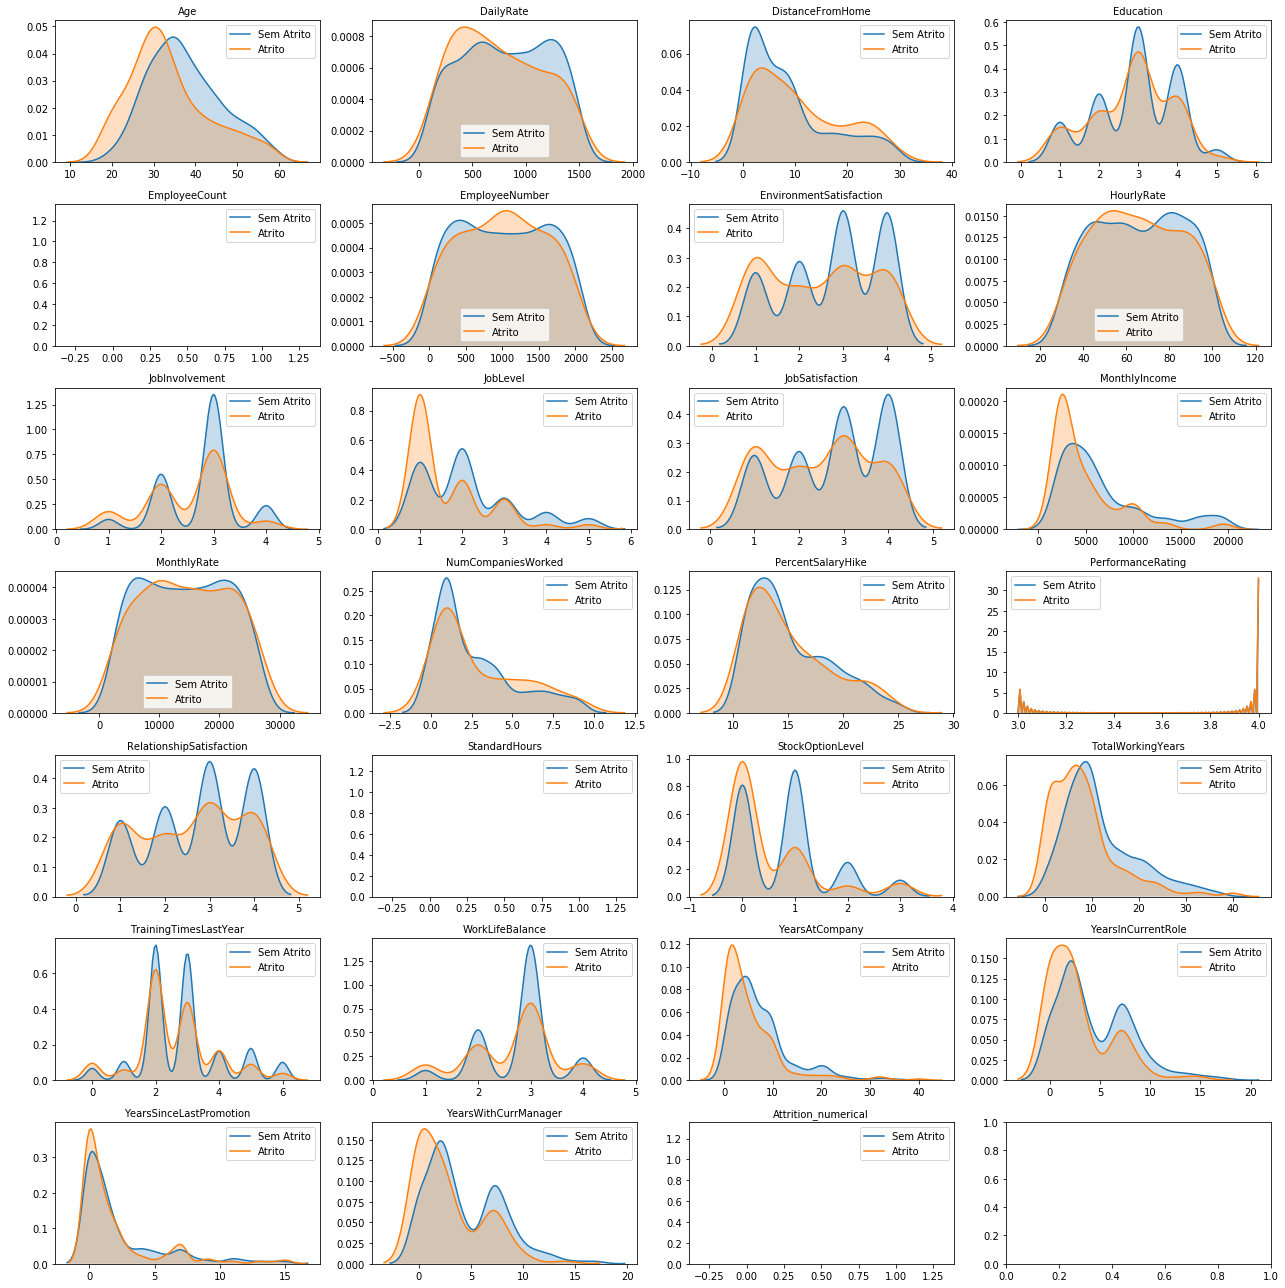

In [13]:
# plotando gráfico de densidade
colunas = df_ibm.drop(['Attrition', 'BusinessTravel', 'Department',
                       'EducationField', 'Gender', 'JobRole', 'MaritalStatus',
                       'Over18', 'OverTime'], axis=1).columns
num_plots = len(colunas)
df_class_0 = df_ibm[df_ibm.Attrition_numerical == 0]
df_class_1 = df_ibm[df_ibm.Attrition_numerical == 1]

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))
fig.subplots_adjust(hspace=1, wspace=1)

idx = 0
for col in colunas:
    idx += 1
    plt.subplot(7, 4, idx)
    sns.kdeplot(df_class_0[col], label="Sem Atrito", shade=True)
    sns.kdeplot(df_class_1[col], label="Atrito", shade=True)
    plt.title(col, fontsize=10)
plt.tight_layout()
plt.savefig('density.png')

### Insights sobre os gráficos de densidade
Os Gráficos de Densidade são ferramentas interessantes para analisarmos as distribuições de acordo com as classes.

> A representação amarela é para funcionários que apresentam atritos e a representação azul para funcionários que não apresentam atrito.

O que buscamos aqui são diferenças nas distribuições para podermos encontrar pontos chave para previsão de atrito entre os funcionários.

No geral, as distribuições são bastante parecidas, não havendo grande discrepância. Por isso, destacarei aqui somente as discrepâncias entre as categorias.

Entre os principais insights obtidos, podemos destacar:
* Na variável `Age` (Idade), percebemos que quanto mais jovem, mais propensão a atrito há.
* Em relação à distância de casa (`DistanceFromHome`), percebemos que quanto maior a distância, mais propenso o funcionário está a atrito.
* Na variável `JobInvolvement`(Envolvimento no Trabalho), podemos perceber que indivíduos menos envolvidos tendem a ter mais atrito.
* `JobLevel` (Nível no Emprego) mostra que funcionários em níveis mais baixos tendem a ter mais atrito. O mesmo acontece para as variáveis `JobSatisfaction` e `MonthlyIncome`, (Satisfação no Trabalho e Renda Mensal, respectivamente).
* `StockOptionLevel` (ESOs) e `TotalWorkingYears` (Total de Anos Trabalhando), também demonstram diminuição nos atritos conforme os números aumentam.
* `YearsAtCompany` (Anos na Empresa), `YearsInCurrentRole` (Anos na Posição Atual), `YearsSinceLastPromotion` (Anos Desde a Última Promoção), `YearsWithCurrManager` (Anos Com o Mesmo Gerente) apresentam maior atrito nos menores períodos de tempo, e evolução ao longo do tempo. Isso pode sugerir dificuldades de adaptação, pois quanto menor o tempo, maior o atrito.

0    1233
1     237
Name: Attrition_numerical, dtype: int64

Atritos Representam 16.12% Do Dataset.



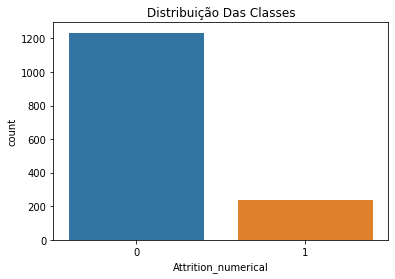

In [14]:
# checando a distribuição da variável alvo
print(df_ibm.Attrition_numerical.value_counts())
print("\nAtritos Representam {:.2f}% Do Dataset.\n".format((df_ibm[df_ibm.Attrition_numerical == 1].shape[0] / df_ibm.shape[0]) * 100))

# plotando gráfico de barras
fig, ax = plt.subplots()
sns.countplot('Attrition_numerical', data=df_ibm, ax=ax)
ax.set_title('Distribuição Das Classes')
plt.plot()
plt.savefig('original_dist.png')

#### Conclusões

Isso significa que 237 (16%) dos 1470 funcionários listados nesse conjunto de dados têm atritos. 

Isso pode ser aceitável, dependendo dos indicadores da empresa, mas para nosso modelo de Machine Learning não é o ideal. Iremos balancear nosso dataset para podemos fazer o Fit em nosso modelo posteriormente.

## Preparando os Dados para Machine Learning

Para inserir nossos dados em um modelo de Machine Learning precisamos trabalhá-los. Ao fazer o pré-processamento dos dados, vamos passar por duas etapas:

* Transformação de variáveis categóricas: Utilizaremos o **Label Encoder**, que transforma Strings em números representando categorias.

* Transformação de variáveis numéricas: Uitlizaremos **MinMaxScaler**. De forma simples, ele coloca os números das entradas em uma escala de 0 a 1. Esse processo também nos ajuda com Outliers, por isso não havíamos tratado eles anteriormente.

In [15]:
# checando o dataset
df_ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,0


In [16]:
# criando cópia do dataset
df_minmax = df_ibm.copy()

# retirando colunas desnecessárias
df_minmax.drop(['Attrition', 'Over18'], axis=1, inplace=True)

df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,80,1,6,3,3,2,2,2,2,0


#### Variáveis Categóricas

In [17]:
# instanciando o encoder
le = LabelEncoder()

# encoding de variáveis numéricas
df_minmax['BusinessTravel'] = le.fit_transform(df_minmax['BusinessTravel'])
df_minmax['Department'] = le.fit_transform(df_minmax['Department'])
df_minmax['EducationField'] = le.fit_transform(df_minmax['EducationField'])
df_minmax['Gender'] = le.fit_transform(df_minmax['Gender'])
df_minmax['JobRole'] = le.fit_transform(df_minmax['JobRole'])
df_minmax['MaritalStatus'] = le.fit_transform(df_minmax['MaritalStatus'])
df_minmax['OverTime'] = le.fit_transform(df_minmax['OverTime'])

# checando o resultado
df_minmax.head()


,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,41,2,1102,2,1,2,1,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,80,0,8,0,1,6,4,0,5,1
1,49,1,279,1,8,1,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,80,1,10,3,3,10,7,1,7,0
2,37,2,1373,1,2,2,4,1,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,80,0,7,3,3,0,0,0,0,1
3,33,1,1392,1,3,4,1,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,80,0,8,3,3,8,7,3,0,0
4,27,2,591,1,2,1,3,1,7,1,1,40,3,1,2,2,1,3468,16632,9,0,12,3,4,80,1,6,3,3,2,2,2,2,0


#### Variáveis Numéricas

In [18]:
# MinMaxScaler
scaler = MinMaxScaler()
df_minmax[['Age']] = scaler.fit_transform(df_minmax[['Age']])
df_minmax[['DailyRate']] = scaler.fit_transform(df_minmax[['DailyRate']])
df_minmax[['EmployeeCount']] = scaler.fit_transform(df_minmax[['EmployeeCount']])
df_minmax[['EmployeeNumber']] = scaler.fit_transform(df_minmax[['EmployeeNumber']])
df_minmax[['HourlyRate']] = scaler.fit_transform(df_minmax[['HourlyRate']])
df_minmax[['MonthlyIncome']] = scaler.fit_transform(df_minmax[['MonthlyIncome']])
df_minmax[['MonthlyRate']] = scaler.fit_transform(df_minmax[['MonthlyRate']])
df_minmax[['NumCompaniesWorked']] = scaler.fit_transform(df_minmax[['NumCompaniesWorked']])
df_minmax[['PercentSalaryHike']] = scaler.fit_transform(df_minmax[['PercentSalaryHike']])
df_minmax[['StandardHours']] = scaler.fit_transform(df_minmax[['StandardHours']])
df_minmax[['TotalWorkingYears']] = scaler.fit_transform(df_minmax[['TotalWorkingYears']])
df_minmax[['TrainingTimesLastYear']] = scaler.fit_transform(df_minmax[['TrainingTimesLastYear']])
df_minmax[['YearsAtCompany']] = scaler.fit_transform(df_minmax[['YearsAtCompany']])
df_minmax[['YearsInCurrentRole']] = scaler.fit_transform(df_minmax[['YearsInCurrentRole']])
df_minmax[['YearsSinceLastPromotion']] = scaler.fit_transform(df_minmax[['YearsSinceLastPromotion']])
df_minmax[['YearsWithCurrManager']] = scaler.fit_transform(df_minmax[['YearsWithCurrManager']])

# checando o resultado
df_minmax.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition_numerical
0,0.547619,2,0.715820,2,1,2,1,0.0,0.000000,2,0,0.914286,3,2,7,4,2,0.262454,0.698053,0.888889,1,0.000000,3,1,0.0,0,0.200,0.0,1,0.15,0.222222,0.000000,0.294118,1
1,0.738095,1,0.126700,1,8,1,1,0.0,0.000484,3,1,0.442857,2,2,6,2,1,0.217009,0.916001,0.111111,0,0.857143,4,4,0.0,1,0.250,0.5,3,0.25,0.388889,0.066667,0.411765,0
2,0.452381,2,0.909807,1,2,2,4,0.0,0.001451,4,1,0.885714,2,1,2,3,2,0.056925,0.012126,0.666667,1,0.285714,3,2,0.0,0,0.175,0.5,3,0.00,0.000000,0.000000,0.000000,1
3,0.357143,1,0.923407,1,3,4,1,0.0,0.001935,4,0,0.371429,3,1,6,3,1,0.100053,0.845814,0.111111,1,0.000000,3,3,0.0,0,0.200,0.5,3,0.20,0.388889,0.200000,0.000000,0
4,0.214286,2,0.350036,1,2,1,3,0.0,0.002903,1,1,0.142857,3,1,2,2,1,0.129489,0.583738,1.000000,0,0.071429,3,4,0.0,1,0.150,0.5,3,0.05,0.111111,0.133333,0.117647,0


### Separando o dataset em Treino e Teste
Para que possamos fazer previsões, precisamos separar o nosso conjunto de dados entre treino e teste.

In [0]:
# separando o dataset
X = df_minmax.drop('Attrition_numerical', axis=1)
y = df_ibm['Attrition_numerical']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

### Balanceando os dados

Anteriormente havíamos visto que a maioria dos funcionários não tinha atrito. Isso significa que nosso conjunto de dados está desbalanceado, e precisa ser tratado para melhorar a performance do nosso modelo.

Para isso, utilizaremos o `RandomUnderSampler`, para preservar a classe minoritária (Atrito).

1    178
0    178
dtype: int64


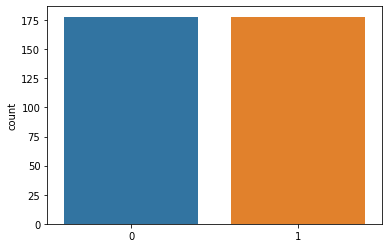

In [20]:
# aplicando o UnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X_train, y_train)

# checando o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# plotando a nova distribuição das classes
sns_plot = sns.countplot(y_rus);
plt.savefig("balanced.png")

## Machine Learning

Após entendermos melhor nossos dados, e a realidade da empresa, e prepararmos nossos dados, é hora de utilizarmos Machine Learning para fazer previsões que podem nos ajudar na prevenção de atritos/conflitos na empresa, e, consequentemente, diminuirmos o Turnover.

<center><img alt='AI' width='30%'src="https://image.freepik.com/free-vector/abstract-artificial-intelligence-background_23-2147738874.jpg"></center>


Para isso, utilizaremos dois modelos diferentes de Machine Learning:

>* Regressão Logística
* Random Forest

### Regressão Logística

De acordo com o Portal Action:

> "*O modelo de regressão logística é semelhante ao modelo de regressão linear. No entanto, no modelo logístico a variável resposta $ Y_i $ é binária. Uma variável binária assume dois valores, como por exemplo, $ Y_i=0 $ e $ Y_i=1, $ denominados "fracasso" e "sucesso", respectivamente. Neste caso, "sucesso" é o evento de interesse.*"

<center><img alt='AI' width='60%'src="https://estatsite.files.wordpress.com/2018/08/linear_vs_logistic_regression.jpg?w=940"></center>

Para nós, "Sucesso" (1), significa atrito, que é o que queremos descobrir.

### Baseline Com Dados Não Balanceados

Como estamos trabalhando em um projeto que existe no vácuo, isto é, sem contexto prévio de métricas já utilizadas pela empresa, precisamos criar uma baseline, um resultado mínimo aceitável, que sirva de referência para nosso aprimoramento.

Neste caso, utilizarei o modelo de Regressão Logística, com nossos dados desbalanceados. Isso é importante para que possamos aferir se há mesmo a necessidade de balancear nossos dados.

In [0]:
# criando uma cópia dos dados desbalanceados
df_desbalanceado = df_minmax.copy()

# separando as variáveis entre X e y
desb_X = df_desbalanceado.drop('Attrition_numerical', axis=1)
desb_y = df_desbalanceado['Attrition_numerical']

# dividindo o conjunto de dados
desb_X_train, desb_X_test, desb_y_train, desb_y_test = train_test_split(desb_X, desb_y, stratify=y, shuffle=True)

In [0]:
# instanciando e treinando um modelo de Regressão Logística
np.random.seed(2)
desb_model = LogisticRegression()
desb_model.fit(desb_X_train, desb_y_train)

# fazendo previsões
desb_y_pred = desb_model.predict(desb_X_test)
desb_y_proba = desb_model.predict_proba(desb_X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.8909    0.9773    0.9321       309
           1     0.7586    0.3729    0.5000        59

    accuracy                         0.8804       368
   macro avg     0.8247    0.6751    0.7160       368
weighted avg     0.8697    0.8804    0.8628       368

Acurácia: 0.8804

AUC: 0.6751



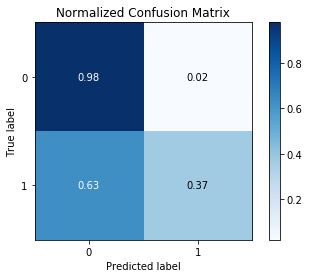

In [23]:
# plotando a matrix de confusão
skplt.metrics.plot_confusion_matrix(desb_y_test, desb_y_pred, normalize=True)

# imprimindo o Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(desb_y_test, desb_y_pred, digits=4))

# Imprimindo a Acurácia
print("Acurácia: {:.4f}\n".format(accuracy_score(desb_y_test, desb_y_pred)))

# printing AUC
print("AUC: {:.4f}\n".format(roc_auc_score(desb_y_test, desb_y_pred)))

### Conclusões
Ao analisarmos a Matriz de Confusão, conseguimos ver que tivemos muitos Falsos Negativos, o que é um problema.

* Apesar do modelo apresentar uma Acurácia de cerca de 87% não podemos levar apenas essa métrica em consideração.
* Nosso AUC foi de 0.6291, o que significa que precisamos melhorar bastante. Para entender melhor sobre ROC_AUC, veja [este artigo](https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772). Para simplificar, apenas entendamos que quanto maior esse valor, melhor.

### Dados Balanceados

Agora que temos nossa baseline, e um objetivo a bater, é hora de trabalharmos com nossos dados cuidadosamente trabalhados e buscarmos o nosso melhor.

In [0]:
# instanciando e treinando um modelo de Regressão Logística
np.random.seed(2)
model = LogisticRegression()
model.fit(X_rus, y_rus)

# fazendo previsões
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9551    0.7573    0.8448       309
           1     0.3902    0.8136    0.5275        59

    accuracy                         0.7663       368
   macro avg     0.6727    0.7854    0.6861       368
weighted avg     0.8645    0.7663    0.7939       368

Acurácia: 0.7663

AUC: 0.7854



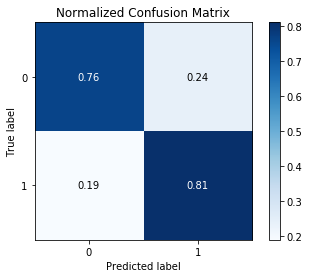

In [27]:
# Matriz de Confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

# Relatório de Classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# Acurácia
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# AUC
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

### Conclusões - Dados Balanceados

Aqui podemos ver que com dados balanceados, nossos resultados foram melhores.

* Apesar da nossa acurácia ter caído, nosso AUC melhorou, o que é bom.
* Entretanto, apesar de termos diminuído a quantidade de Falsos Negativos, aumentamos a de Falsos Positivos.

De qualquer forma, obtivemos um resultado melhor que nossa baseline, o que já é um passo na direção correta.

### Random Forest

Vamos testar se conseguiríamos um resultado superior utilizando outro algoritmo de Machine Learning. Neste caso, utilizaremos o **Random Forest**, que em tradução livre, significa "Floresta Aleatória".

<center><img alt='Random Forest' width='60%'src="https://cdn-cms.f-static.net/uploads/892738/2000_5b61d8595accd.jpg"></center>

Como o nome sugere, ele é baseado em modelos de árvore de decisão. A diferença é que ele cria **muitas árvores de decisão de maneira aleatória**.

Vamos ver como ele se sai.

In [28]:
# criando e treinando o modelo
seed = 0
rf = RandomForestClassifier(n_jobs = -1,
                            n_estimators= 1000,
                            max_features= 0.3,
                            max_depth= 3,
                            min_samples_leaf= 3,
                            random_state= seed, verbose= 0)
rf.fit(X_rus, y_rus)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features=0.3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9392    0.7994    0.8636       309
           1     0.4095    0.7288    0.5244        59

    accuracy                         0.7880       368
   macro avg     0.6743    0.7641    0.6940       368
weighted avg     0.8542    0.7880    0.8092       368

Acurácia:	 0.7880

ROC_AUC:	 0.7641



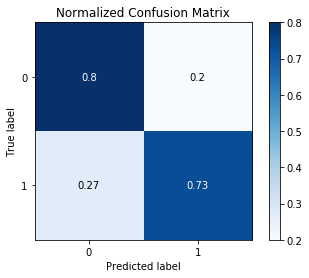

In [29]:
# fazendo previsões
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# Relatório de Classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred, digits=4))

# Acurácia
print('Acurácia:\t {:.4f}\n'.format(accuracy_score(y_test, y_pred)))

# AUC
print('ROC_AUC:\t {:.4f}\n'.format(roc_auc_score(y_test, y_pred)))

# confusion matrix
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True);

### Variáveis Mais Importantes
Outra verificação interessante que podemos fazer é em relação às features (variáveis) mais importantes para o resultado do modelo.

In [0]:
# calculando importância das features para Random Forest
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances.reset_index(inplace=True)
feature_importances.rename(columns={"index": "features"}, inplace=True)

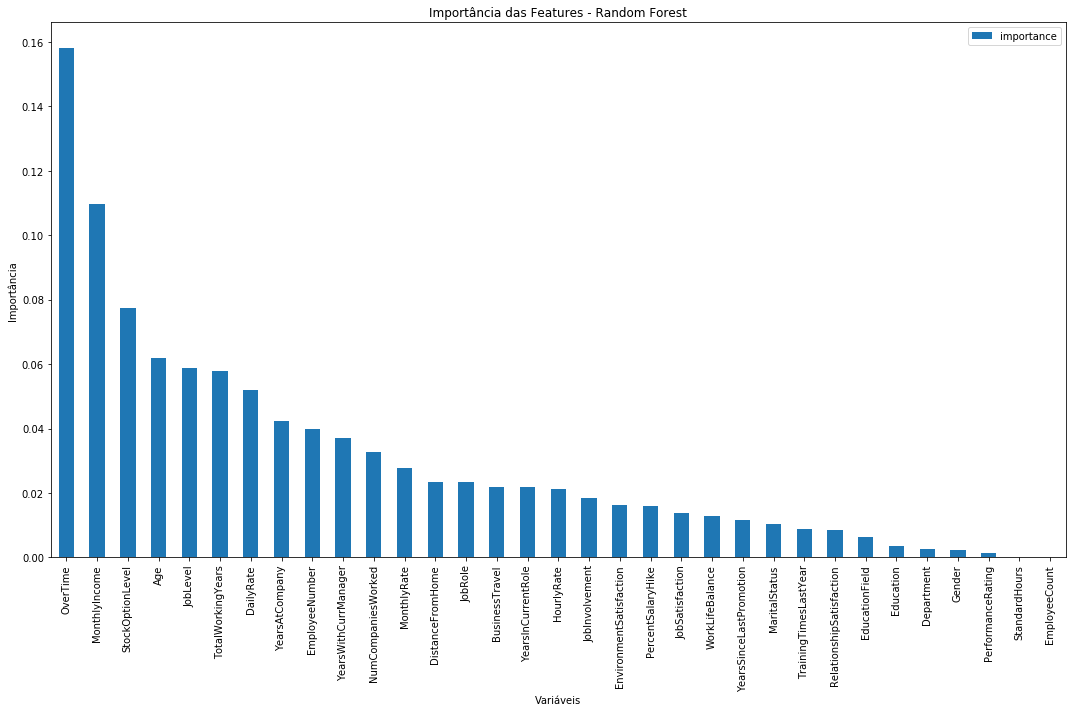

In [32]:
# plotar o gráfico de barras para variáveis mais importantes
fig, ax = plt.subplots(figsize=(15,10))

feature_importances.plot(x="features", y="importance", kind="bar", ax=ax)

ax.set_title("Importância das Features - Random Forest")
ax.set_xlabel("Variáveis")
ax.set_ylabel("Importância")

plt.savefig("feat_imp.png")
plt.tight_layout()

## Conclusões - Random Forest

O modelo Random Forest se saiu marginalmente melhor que a Regressão Logística.

Apesar de não representar melhora significativa, com melhor parametrização, ambos modelos podem ter sua performance aumentada.

Entretanto, as variáveis mais importantes são muito valiosas, pois podem nos dar insights dos pontos mais críticos para geração de atritos, e com essa informação, podemos agir preventivamente.

Entre as principais variáveis, podemos destacar:
* Horas Extras (OverTime) - Definitivamente a mais importante das variáveis,estando bastante acima das outras.
* Salário Mensal (MonthlyIncome)
* ESOs (StockOptionLevel)
* Idade (Age)
* Nível do Cargo (JobLevel)
* Anos Trabalhando (TotalWorkingYears)

Podemos identificar variáveis bastante relacionadas com a carreira, benefícios e carga horária. Altos níveis de stress? Sentimento de desvalorização? São hipóteses. Somente uma análise mais detalhada pode nos dizer.


# Conclusões

Ciência de Dados é um campo em expansão, com muita coisa a ser explorada e melhorada. Neste projeto, o intuito foi apresentar uma espécie de MVP para o departamento de RH.

Sem sombra de dúvidas, com acesso a mais dados, colaboração com outros times da empresa, maior entendimento do contexto em que a empresa se encontra e otimização dos modelos apresentados e/ou inclusão de outros, os resultados podem ser muito melhores.

De qualquer forma, espero ter fornecido insights interessantes, e um projeto pertinente. Caso tenha algum comentário, dúvida ou sugestão, não hesite em me contactar no meu [LinkedIn](https://www.linkedin.com/in/rafael-n-duarte/), e conferir meus outros projetos no [GitHub](https://github.com/rafaelnduarte).

## Obrigado!
<center><img width = '80%'src= "https://github.com/rafaelnduarte/Analysis_of_Violence_in_Rio_de_Janeiro/raw/master/img/rafaelnd_ds.png"></center>